In [2]:
import keras
from keras.models import Model
from keras.layers import Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

In [3]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="wheat_leaf/train",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="wheat_leaf/test", target_size=(224,224))

Found 284 images belonging to 3 classes.
Found 123 images belonging to 3 classes.


In [4]:
from keras.applications.vgg16 import VGG16
vggmodel = VGG16(weights='imagenet', include_top=True)

In [5]:
vggmodel.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
for layers in (vggmodel.layers)[:19]:
    print(layers)
    layers.trainable = False

In [18]:
X= vggmodel.layers[-3].output
predictions = Dense(3, activation="softmax")(X)
model_final = Model(vggmodel.input, predictions)

In [24]:
model_final.compile(loss = "categorical_crossentropy", optimizer = 
                    optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])


c:\Users\Lucille\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [35]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
metric = 'val_accuracy'
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor=metric, verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq='epoch')
early = EarlyStopping(monitor=metric, min_delta=0, patience=20, verbose=1, mode='auto')
hist = model_final.fit(traindata, validation_data= testdata,epochs= 100, callbacks=[checkpoint,early])
for key in hist.history:
    print(key)
model_final.save_weights("vgg16_1.h5")

Epoch 1/10
9/9 [==============================] - ETA: 0s - loss: 5.4664e-06 - accuracy: 1.0000
Epoch 1: val_accuracy improved from -inf to 0.52846, saving model to vgg16_1.h5
9/9 [==============================] - 59s 7s/step - loss: 5.4664e-06 - accuracy: 1.0000 - val_loss: 14.9951 - val_accuracy: 0.5285
Epoch 2/10
9/9 [==============================] - ETA: 0s - loss: 5.3245e-06 - accuracy: 1.0000
Epoch 2: val_accuracy did not improve from 0.52846
9/9 [==============================] - 56s 6s/step - loss: 5.3245e-06 - accuracy: 1.0000 - val_loss: 14.9938 - val_accuracy: 0.5285
Epoch 3/10
9/9 [==============================] - ETA: 0s - loss: 5.1592e-06 - accuracy: 1.0000
Epoch 3: val_accuracy did not improve from 0.52846
9/9 [==============================] - 56s 6s/step - loss: 5.1592e-06 - accuracy: 1.0000 - val_loss: 14.9925 - val_accuracy: 0.5285
Epoch 4/10
9/9 [==============================] - ETA: 0s - loss: 5.0455e-06 - accuracy: 1.0000
Epoch 4: val_accuracy did not improve 

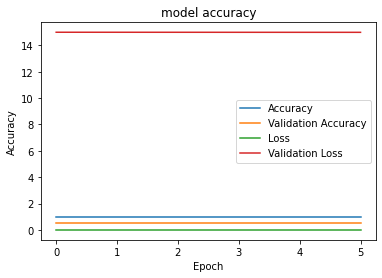

In [36]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","Loss","Validation Loss"])
plt.show()

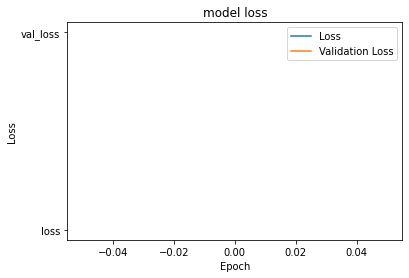